In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

DATA_DIR = os.path.join("..", "data")

In [142]:
df = pd.DataFrame()

data_filenames = [f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))]
data_filenames = sorted(data_filenames)

for filename in data_filenames:
    invoice_filename = os.path.join(DATA_DIR, filename)
    invoice_df = pd.read_json(invoice_filename)
    
    # Rename column names where applicable
    invoice_df = invoice_df.rename(columns={
        'total_price': 'price',
        'StreamID': 'stream_id',
        'TimesViewed': 'times_viewed'
    })
    
    df = df.append(invoice_df)

# Convert year, month, day to a datetime column
df["date"] = pd.to_datetime(df.year*10000+df.month*100+df.day, format='%Y%m%d')
df = df.drop(columns=['year', 'month', 'day'])

# Set country to a categorical type
df['country'] = df['country'].astype('category')
df['invoice'] = df['invoice'].astype('category')
df['customer_id'] = df['customer_id'].astype('category')
df['stream_id'] = df['stream_id'].astype('category')

# Reorder columns
df = df[['date', 'price', 'times_viewed', 'stream_id', 'country', 'customer_id', 'invoice']]

# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.02), df['price'].quantile(0.98))]
    
df

,date,price,times_viewed,stream_id,country,customer_id,invoice
0,2017-11-28,6.95,12,85048,United Kingdom,13085.0,489434
1,2017-11-28,8.65,1,22130,United Kingdom,NaN,489597
2,2017-11-28,1.70,6,22132,United Kingdom,NaN,489597
3,2017-11-28,1.70,4,22133,United Kingdom,NaN,489597
4,2017-11-28,0.87,1,22134,United Kingdom,NaN,489597
...,...,...,...,...,...,...,...
42013,2019-07-31,0.85,12,21544,United Kingdom,15628.0,562163
42014,2019-07-31,1.95,8,47591D,United Kingdom,15628.0,562163
42015,2019-07-31,0.83,12,23167,United Kingdom,15628.0,562163
42016,2019-07-31,4.95,3,22138,United Kingdom,15628.0,562163


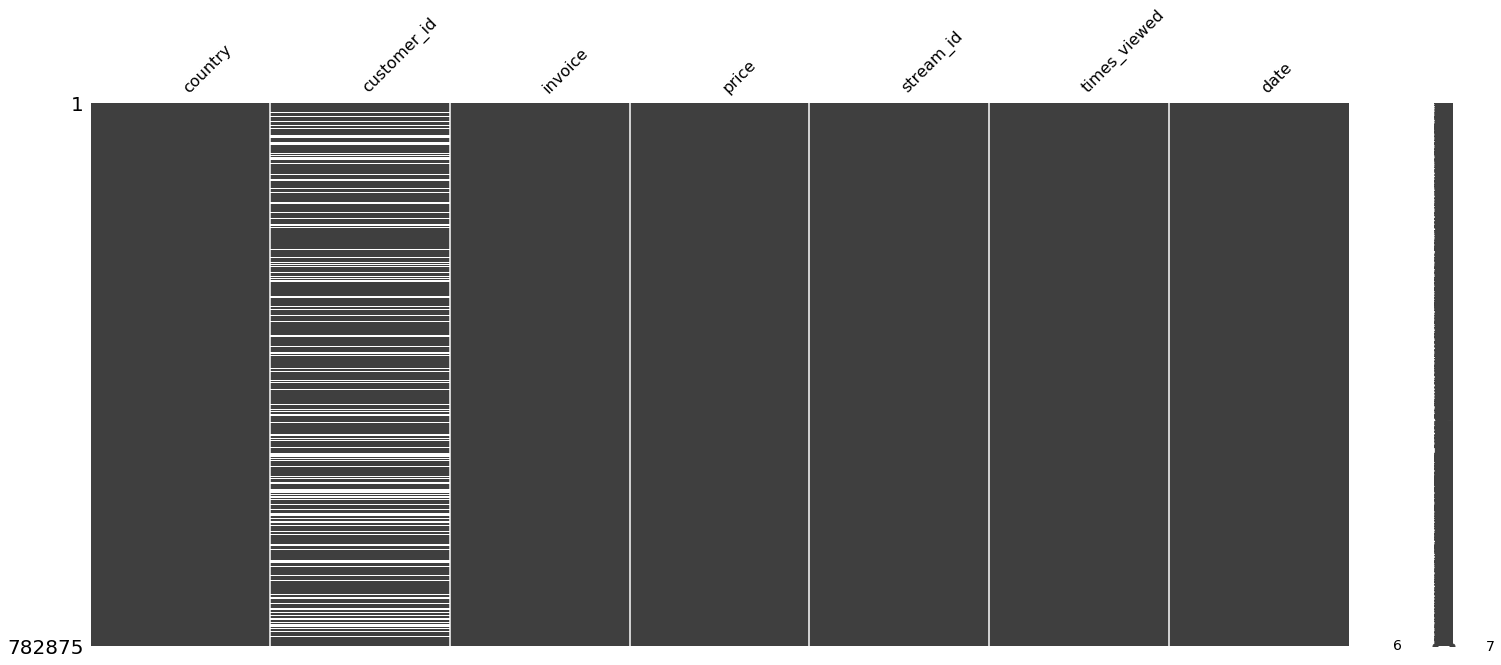

In [108]:
msno.matrix(df)
plt.show()

In [149]:
df['invoice'].value_counts()

537434    1298
538071    1250
537638    1170
537823    1148
536876    1146
          ... 
499154       0
551459       0
499156       0
499157       0
525339       0
Name: invoice, Length: 42646, dtype: int64

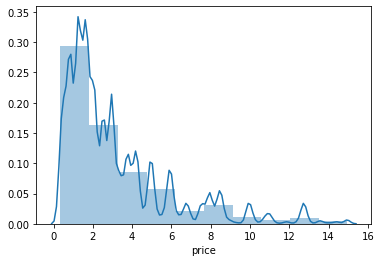

In [110]:
sns.distplot(df['price'], bins=10)

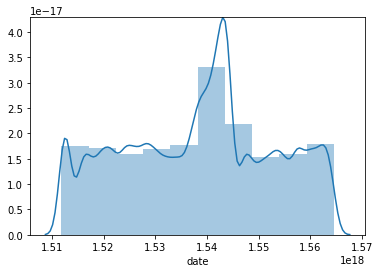

In [120]:
sns.distplot(df['date'], bins=10)
plt.show()

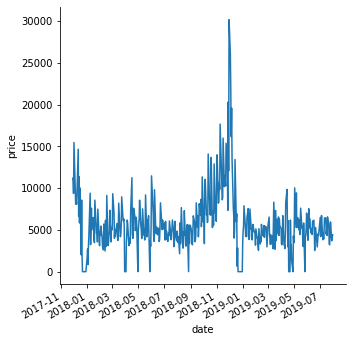

In [152]:
g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()

In [62]:
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country.head()

,country,revenue
0,United Kingdom,3.521514e+06
1,EIRE,1.070692e+05
2,Germany,4.927182e+04
3,France,4.056514e+04
4,Norway,3.849475e+04


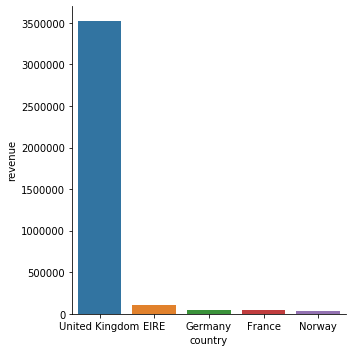

In [111]:
sns.catplot(x='country', y='revenue', data=revenue_by_country[:5], kind='bar')
plt.show()

In [51]:
revenue_by_country.index

Index(['United Kingdom', 'EIRE', 'Germany', 'France', 'Norway', 'Spain',
       'Hong Kong', 'Portugal', 'Singapore', 'Netherlands', 'Belgium',
       'Switzerland', 'Sweden', 'Channel Islands', 'Australia', 'Malta',
       'Italy', 'Cyprus', 'Austria', 'Finland', 'RSA', 'Unspecified', 'Greece',
       'United Arab Emirates', 'Denmark', 'Poland', 'USA', 'Japan', 'Canada',
       'Iceland', 'Lithuania', 'Israel', 'Bahrain', 'Lebanon',
       'European Community', 'Brazil', 'Thailand', 'Korea', 'West Indies',
       'Nigeria', 'Bermuda', 'Czech Republic', 'Saudi Arabia'],
      dtype='object', name='country')

In [91]:
df['country'].value_counts()

43